In [1]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy cftime xarray

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import xarray as xr
import os

# Define the path to your forecast data directory
data_path = '/nfs/turbo/seas-dannes/urop-2024-bias/cfs-forecasts/archive/20230101/'

# List all files in the directory
files = os.listdir(data_path)
print("Files in directory:", files)

# Filter files to identify one `flxf` and one `pgbf` file
flxf_files = [f for f in files if 'flxf' in f]
pgbf_files = [f for f in files if 'pgbf' in f]

# Print identified files
print("FLX Files:", flxf_files)
print("PGP Files:", pgbf_files)

# Select one `flxf` and one `pgbf` file to inspect
flxf_file = os.path.join(data_path, flxf_files[0])
pgbf_file = os.path.join(data_path, pgbf_files[0])

print(f"Selected FLXF file: {flxf_file}")
print(f"Selected PGBF file: {pgbf_file}")

# Load the datasets
flxf_ds = xr.open_dataset(flxf_file)
pgbf_ds = xr.open_dataset(pgbf_file)

#Print dataset summaries
print(flxf_ds)
print(pgbf_ds)
# print(flxf_ds)

Files in directory: ['pgbf.01.2023010106.allmonths.cnbs.nc', 'flxf.01.2023010106.allmonths.cnbs.nc', 'flxf.01.2023010118.allmonths.cnbs.nc', 'pgbf.01.2023010112.allmonths.cnbs.nc', 'pgbf.01.2023010118.allmonths.cnbs.nc', 'flxf.01.2023010112.allmonths.cnbs.nc', 'flxf.01.2023010100.allmonths.cnbs.nc', 'pgbf.01.2023010100.allmonths.cnbs.nc']
FLX Files: ['flxf.01.2023010106.allmonths.cnbs.nc', 'flxf.01.2023010118.allmonths.cnbs.nc', 'flxf.01.2023010112.allmonths.cnbs.nc', 'flxf.01.2023010100.allmonths.cnbs.nc']
PGP Files: ['pgbf.01.2023010106.allmonths.cnbs.nc', 'pgbf.01.2023010112.allmonths.cnbs.nc', 'pgbf.01.2023010118.allmonths.cnbs.nc', 'pgbf.01.2023010100.allmonths.cnbs.nc']
Selected FLXF file: /nfs/turbo/seas-dannes/urop-2024-bias/cfs-forecasts/archive/20230101/flxf.01.2023010106.allmonths.cnbs.nc
Selected PGBF file: /nfs/turbo/seas-dannes/urop-2024-bias/cfs-forecasts/archive/20230101/pgbf.01.2023010106.allmonths.cnbs.nc
<xarray.Dataset>
Dimensions:            (time: 10, latitude: 18

In [2]:
import matplotlib.pyplot as plt
# Define function to plot data variable for a specific season in North America in 2023
def plot_variable(ds, var_name, season, ax=None):
    if season == "Spring": time = "2023-04-01T06:00:00" # April for spring
    if season == "Summer": time = "2023-07-01T06:00:00" # July for summer
    if season == "Fall": time = "2023-10-01T06:00:00" # October for fall
    if season == "Winter": time = "2023-01-01T06:00:00" # January for winter

    if var_name in ds.variables:
        data_var = ds[var_name].sel(time=time, longitude = slice(180,350), latitude = slice(10, 85)) # slicing as we are only interested in NA region
        if ax is None:
            ax = plt.gca()  
        data_var.plot(ax=ax)
        ax.set_title(f'{var_name} for {season}')
    else:
        print(f"{var_name} not found")


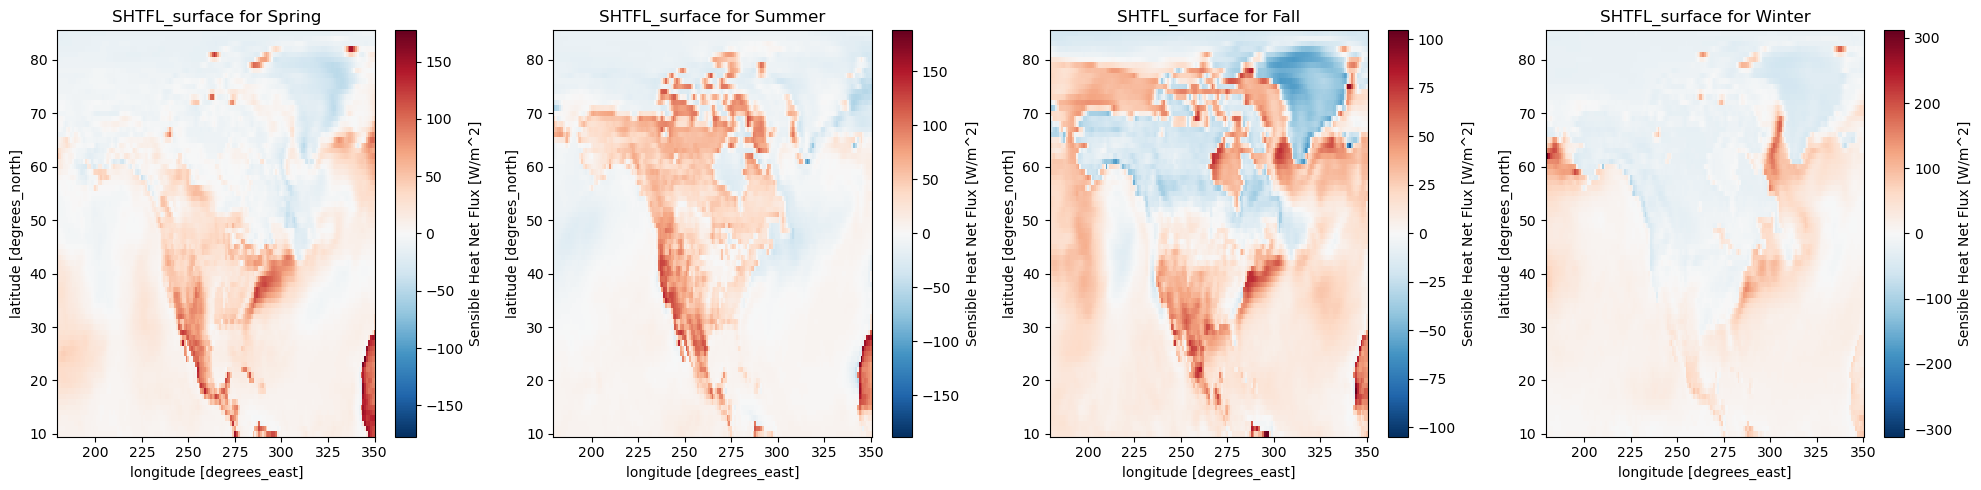

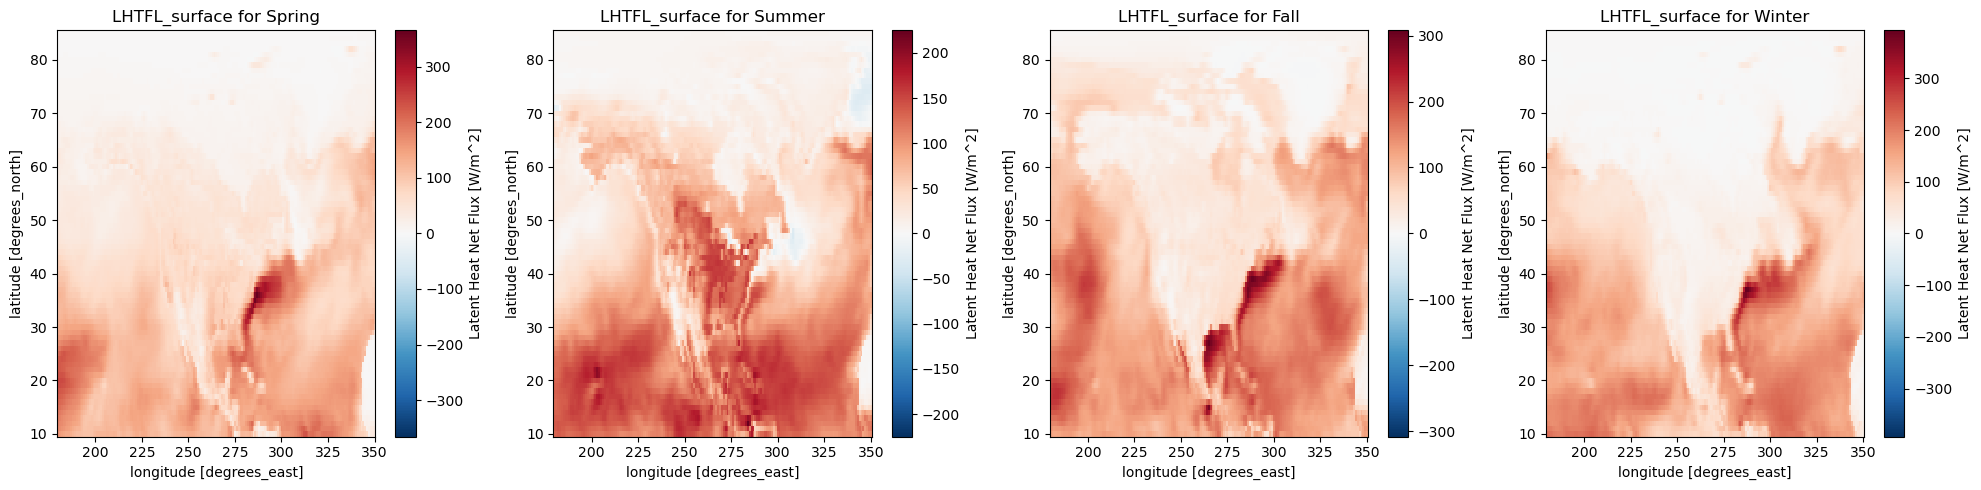

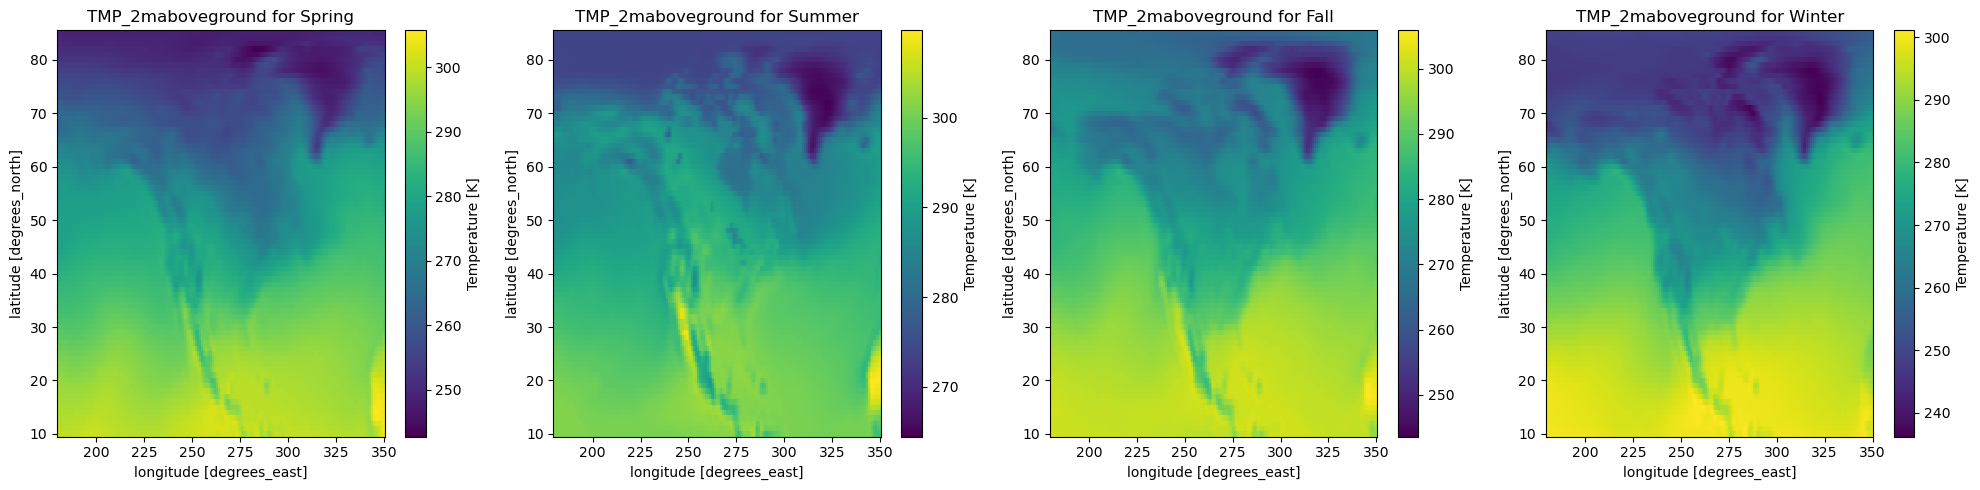

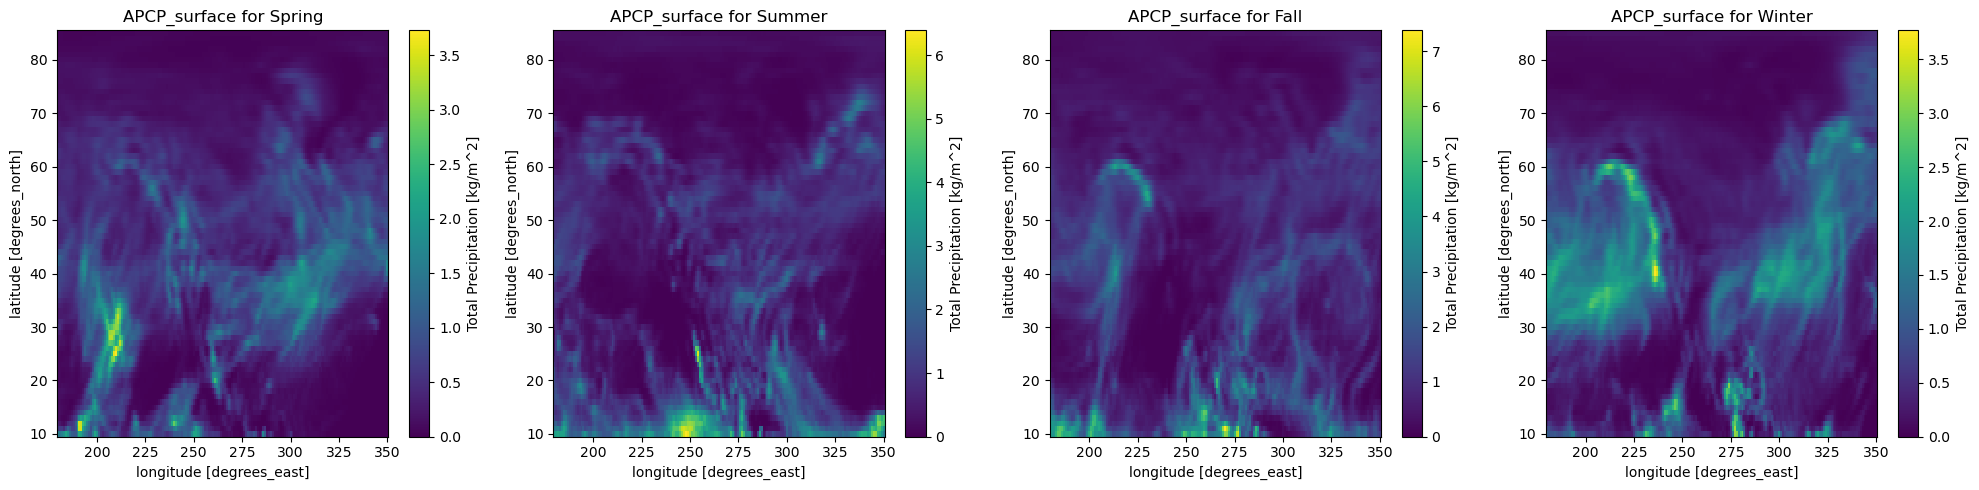

In [3]:
# The sensible heat flux for each season
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns
plot_variable(flxf_ds, 'SHTFL_surface', "Spring", ax=axes[0])
plot_variable(flxf_ds, 'SHTFL_surface', "Summer", ax=axes[1])
plot_variable(flxf_ds, 'SHTFL_surface', "Fall", ax=axes[2])
plot_variable(flxf_ds, 'SHTFL_surface', "Winter", ax=axes[3])
plt.tight_layout()
plt.show()
# The sensible heat flux is highest on land is highest in summer, with the most extreme at the west coast
# In fall, the sensible heat flux starts to transfer from land to sea. The heat flux in Canada is notable as it turns from positive to negative.

# The latent heat flux for each season
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns
plot_variable(flxf_ds, 'LHTFL_surface', "Spring", ax=axes[0])
plot_variable(flxf_ds, 'LHTFL_surface', "Summer", ax=axes[1])
plot_variable(flxf_ds, 'LHTFL_surface', "Fall", ax=axes[2])
plot_variable(flxf_ds, 'LHTFL_surface', "Winter", ax=axes[3])
plt.tight_layout()
plt.show()
# The latent heat flux is high for both land and sea in summer. In the other seasons the heat flux is higher in sea than on land.


# The 2m temperature for each season
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns
plot_variable(flxf_ds, 'TMP_2maboveground', "Spring", ax=axes[0])
plot_variable(flxf_ds, 'TMP_2maboveground', "Summer", ax=axes[1])
plot_variable(flxf_ds, 'TMP_2maboveground', "Fall", ax=axes[2])
plot_variable(flxf_ds, 'TMP_2maboveground', "Winter", ax=axes[3])
plt.tight_layout()
plt.show()
# The 2m temperature is relatively constant from season to season, although summer exhibits a higher temperature in sea.


# The accumulated precipitation for each season
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns
plot_variable(pgbf_ds, 'APCP_surface', "Spring", ax=axes[0])
plot_variable(pgbf_ds, 'APCP_surface', "Summer", ax=axes[1])
plot_variable(pgbf_ds, 'APCP_surface', "Fall", ax=axes[2])
plot_variable(pgbf_ds, 'APCP_surface', "Winter", ax=axes[3])
plt.tight_layout()
plt.show()
# The precipitation is higher on sea than on land in fall and winter, which is the opposite for summer. 
# For spring, the precipitation is spread equally across land and sea.

In [4]:
# Function to plot time series for a variable at a specific location
def plot_time_series(ds, var_name, latitude, longitude):
    if var_name in ds.variables:
        data_var = ds[var_name].sel(latitude=latitude, longitude=longitude, method='nearest')
        data_var.plot()
        plt.title(f'Time Series of {var_name} at Lat: {latitude}, Lon: {longitude}')
        plt.xlabel('Time')
        plt.ylabel(var_name)
        plt.show()
    else:
        print(f"{var_name} not found in dataset")

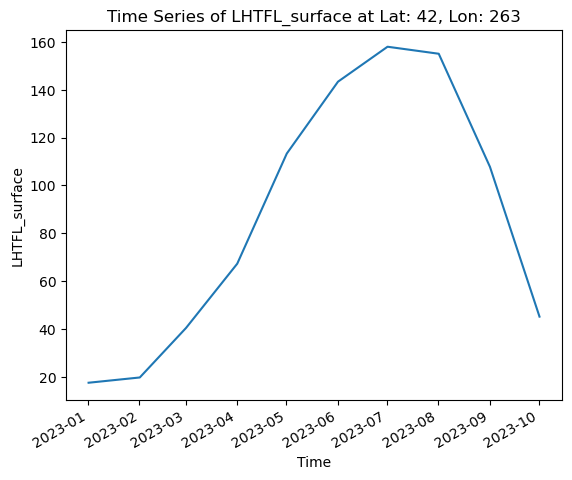

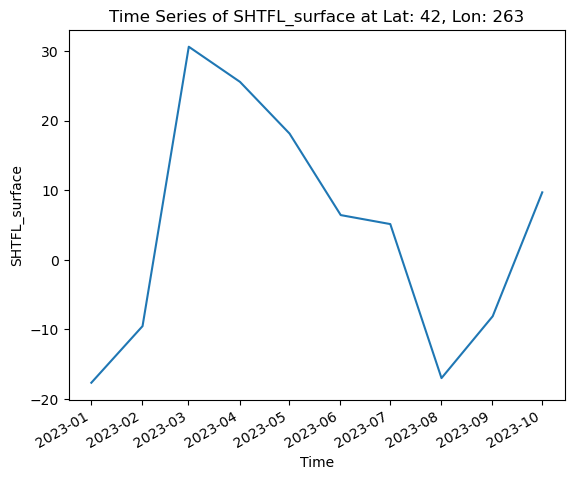

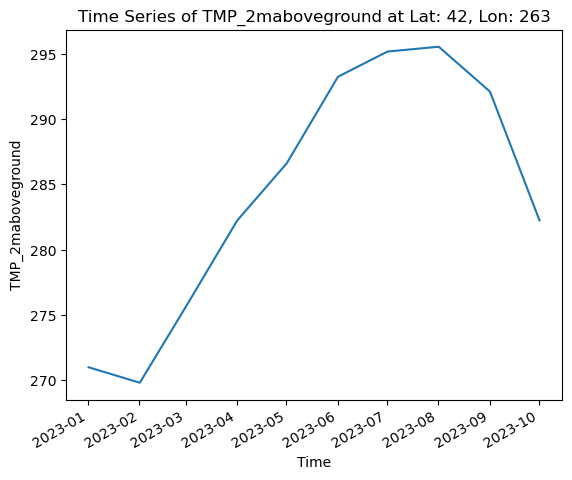

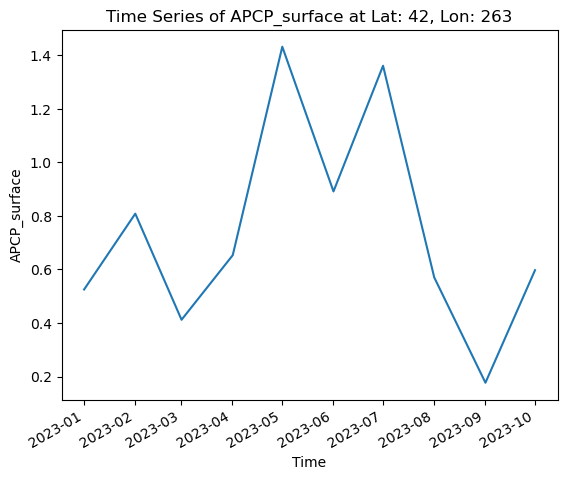

In [7]:
lat, lon = 42, 263 # Michigan Union's location
plot_time_series(flxf_ds, 'LHTFL_surface', lat, lon)
plot_time_series(flxf_ds, 'SHTFL_surface', lat, lon)
plot_time_series(flxf_ds, 'TMP_2maboveground', lat, lon)
plot_time_series(pgbf_ds, 'APCP_surface', lat, lon)

# The latent heat flux and 2m temperature above ground is the most extreme around July and August, which is summer time. 
# The sensible heat flux peaks at March and has a minimum at January and August.
# The accumulated precipitation fluctuates throughout the year, with a peak at May and July and a minimum at September.